In [ ]:
import pandas as pd

df = pd.read_csv('survey_results_public.csv')


In [ ]:
df.head(2)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0


In [ ]:
df.shape

(80635, 84)

In [ ]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [ ]:
df.isnull().sum()
#80635-2360

,0
ResponseId,0
Q120,0
MainBranch,0
Age,0
Employment,1134
...,...
ProfessionalTech,41893
Industry,46530
SurveyLength,2411
SurveyEase,2360


In [ ]:
df_cleaned = df.dropna(subset=['SurveyEase'])


In [ ]:
df_cleaned.shape

(78275, 84)

In [ ]:
df_cleaned = df_cleaned.dropna(subset=['SurveyEase'])
df_cleaned.shape

(78275, 84)

In [ ]:
df_clean = df.dropna(subset=['YearsCode', 'EdLevel', 'ConvertedCompYearly', 'LanguageHaveWorkedWith'])

In [ ]:
df_clean.shape

(44258, 84)

In [ ]:
# df_clean['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)
df_clean[['YearsCode', 'EdLevel', 'ConvertedCompYearly', 'LanguageHaveWorkedWith']].isnull().sum()

/tmp/ipython-input-24-3601672587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)
/tmp/ipython-input-24-3601672587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)


,0
YearsCode,0
EdLevel,0
ConvertedCompYearly,0
LanguageHaveWorkedWith,0


In [ ]:
df_selected = df_clean[['YearsCode', 'EdLevel', 'ConvertedCompYearly', 'LanguageHaveWorkedWith']]
df_selected.head(3)

df_filtered = df_selected[(df_selected['ConvertedCompYearly'] >= 10000) & (df_selected['ConvertedCompYearly'] <= 1000000)]

In [ ]:
df_filtered.shape
df_filtered.head()

,YearsCode,EdLevel,ConvertedCompYearly,LanguageHaveWorkedWith
1,18,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",285000.0,HTML/CSS;JavaScript;Python
2,27,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",250000.0,Bash/Shell (all shells);Go
3,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
4,6,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23456.0,HTML/CSS;JavaScript;TypeScript
5,21,Some college/university study without earning ...,96828.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...


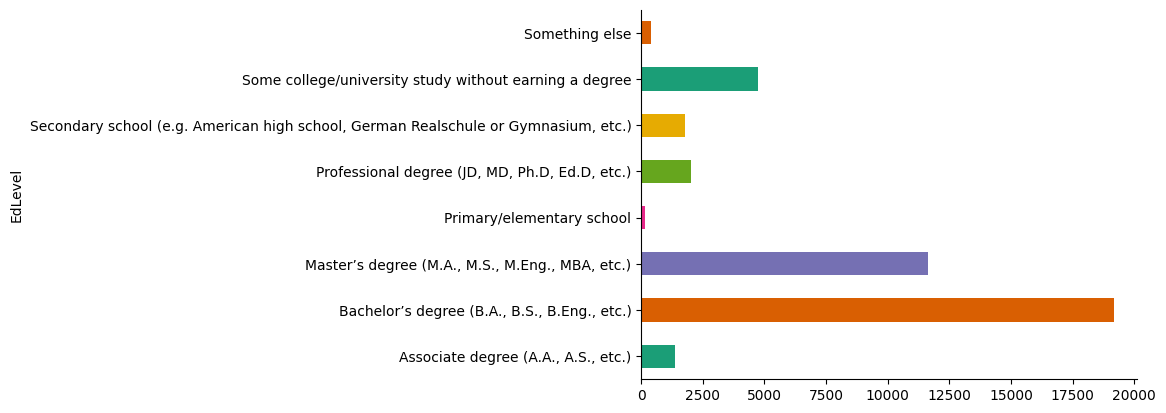

In [ ]:
# @title EdLevel

from matplotlib import pyplot as plt
import seaborn as sns
df_filtered.groupby('EdLevel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-29-711162516.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_filtered, x='ConvertedCompYearly', y='EdLevel', inner='box', palette='Dark2')


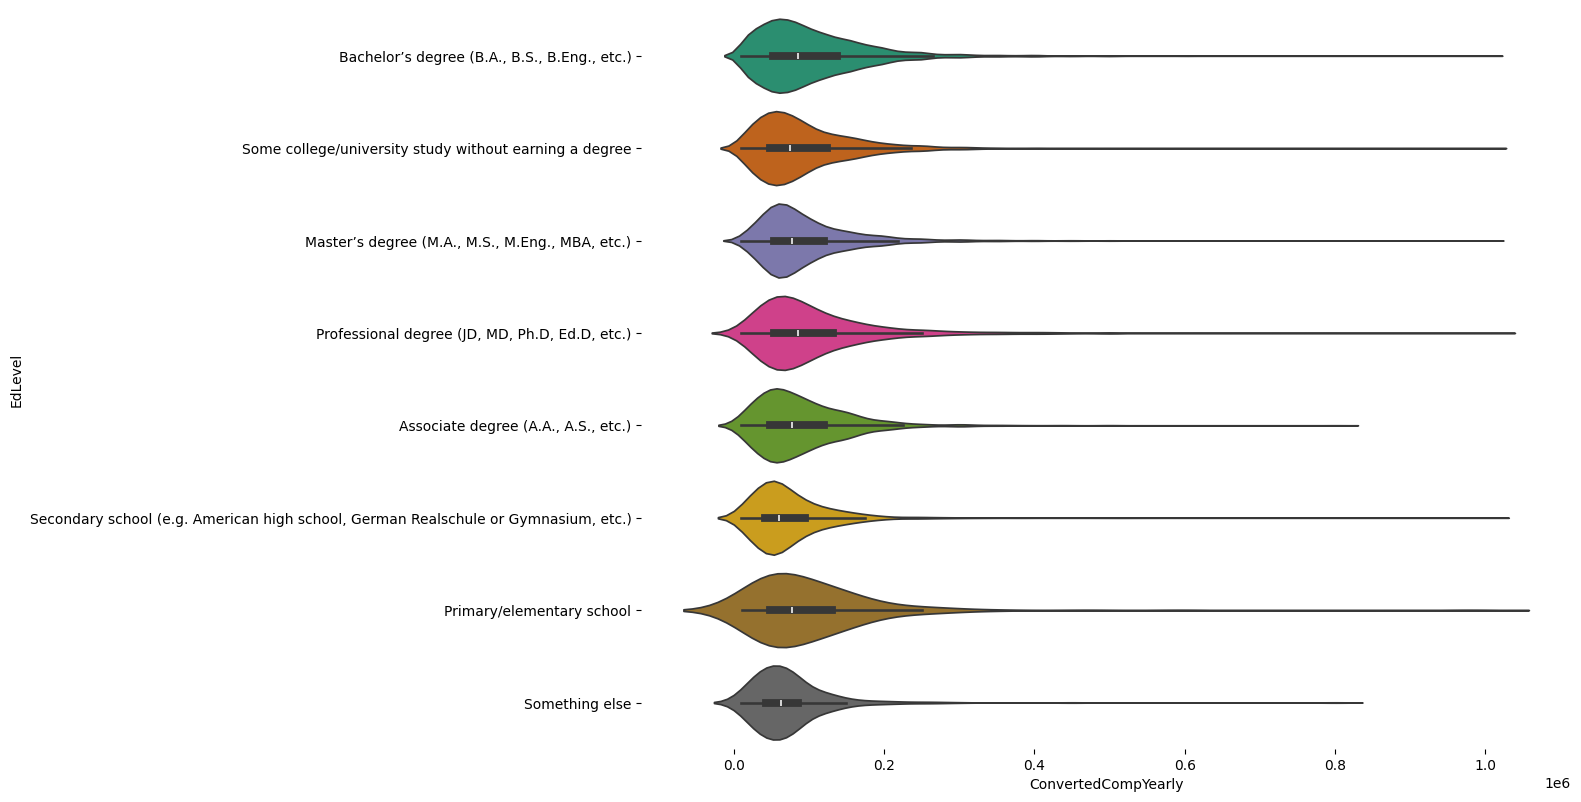

In [ ]:
# @title EdLevel vs ConvertedCompYearly

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_filtered['EdLevel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_filtered, x='ConvertedCompYearly', y='EdLevel', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')

/tmp/ipython-input-34-4250110868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Languages'] = df_filtered['LanguageHaveWorkedWith'].str.split(';')
